In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from yellowbrick.classifier import classification_report
from yellowbrick.classifier.rocauc import roc_auc
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, KFold
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import plotly.express as px
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import warnings

In [41]:
metricas = {

    'Acuracia' : [],
    'Precisão':[],
    'Recall': [],
    'F-score':[],
}
def dados_metricas(metricas,y_test,y_pred):
    for c, i in metricas.items():
        if c == 'Acuracia':
            i.append(accuracy_score(y_test,y_pred))
        elif c =='Precisão':
            i.append(precision_score(y_test,y_pred,average='weighted'))
        elif c=='Recall':
            i.append(recall_score(y_test,y_pred,average='weighted'))
        elif c=='F-score':
            i.append(f1_score(y_test,y_pred,average='weighted'))

In [42]:
df = pd.read_csv('/content/drive/MyDrive/ADA - ML I/data.csv')

In [43]:
cancer_df = df[['diagnosis','radius_mean','texture_mean','perimeter_mean','area_mean','symmetry_mean']]
cancer_df.columns = ['diagnostico','raio','textura','perímetro','área','simetria']

In [44]:
cancer_df['diagnostico'].value_counts()

0    357
1    212
Name: diagnostico, dtype: int64

In [45]:
cancer_df['diagnostico'].value_counts(normalize=True)

0    0.627417
1    0.372583
Name: diagnostico, dtype: float64

<Axes: xlabel='diagnostico', ylabel='count'>

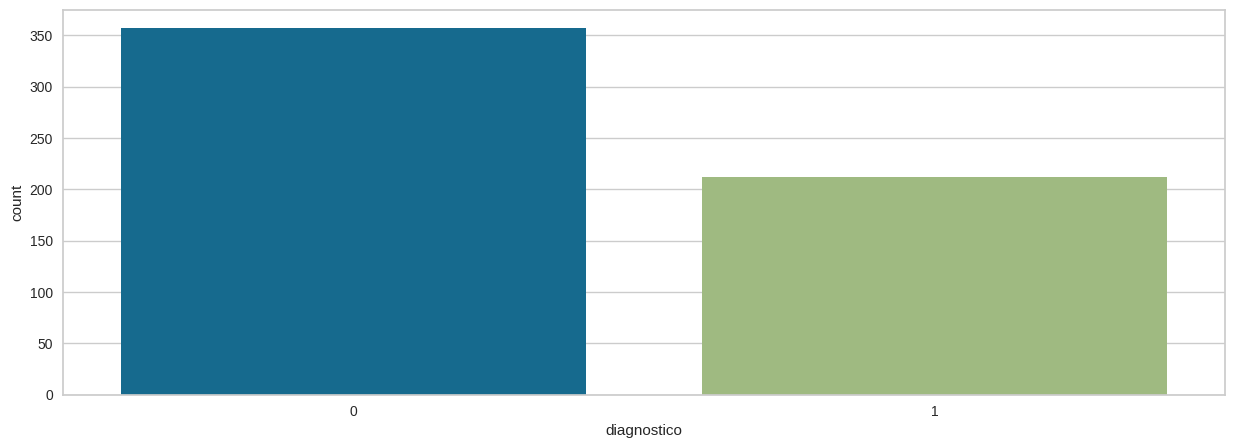

In [46]:
plt.figure(figsize=(15,5))
sns.countplot(data=cancer_df,x='diagnostico')

In [47]:
X = cancer_df.drop(['diagnostico'], axis=1)
y = cancer_df['diagnostico']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)

In [48]:
print('Conjunto de treinamento : ',X_train.shape)
print('Conjunto de teste : ',X_test.shape)

Conjunto de treinamento :  (455, 5)
Conjunto de teste :  (114, 5)


## Regressão Logistica

In [49]:


pipeline_rl = Pipeline(
                    [
                        ("Normalização", StandardScaler()),
                        ('Regressão Logistica',LogisticRegression(penalty='l2',C=87))
                    ]
)

In [50]:
pipeline_rl.fit(X_train, y_train)

Pipeline(steps=[('Normalização', StandardScaler()),
                ('Regressão Logistica', LogisticRegression(C=87))])

******************** TREINAMENTO ********************

******************** Metricas do Treinamento ********************
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       286
           1       0.92      0.85      0.89       169

    accuracy                           0.92       455
   macro avg       0.92      0.91      0.91       455
weighted avg       0.92      0.92      0.92       455

******************** Matris de Confusão ********************


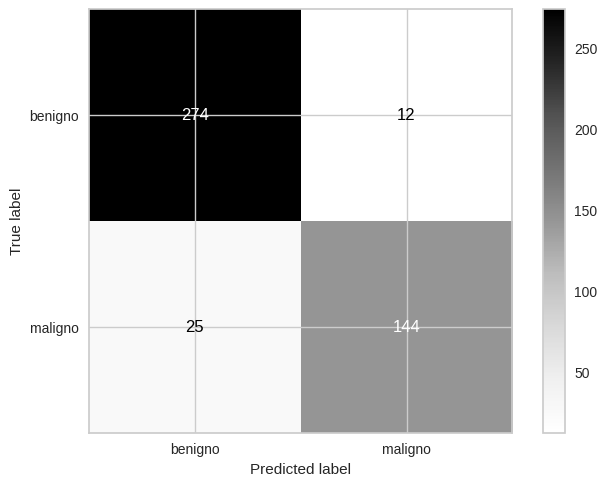

In [51]:
print ('''******************** TREINAMENTO ********************''')

y_pred_treino = pipeline_rl .predict(X_train)

print('\n******************** Metricas do Treinamento ********************')

print(metrics.classification_report(y_train,y_pred_treino))

print('''******************** Matris de Confusão ********************''')

ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_train, y_pred_treino), display_labels =['benigno','maligno']).plot(cmap="Greys")

plt.show()


******************** TESTE ********************

******************** Metricas do Treinamento ********************
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        71
           1       0.93      0.91      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114

******************** Matris de Confusão ********************


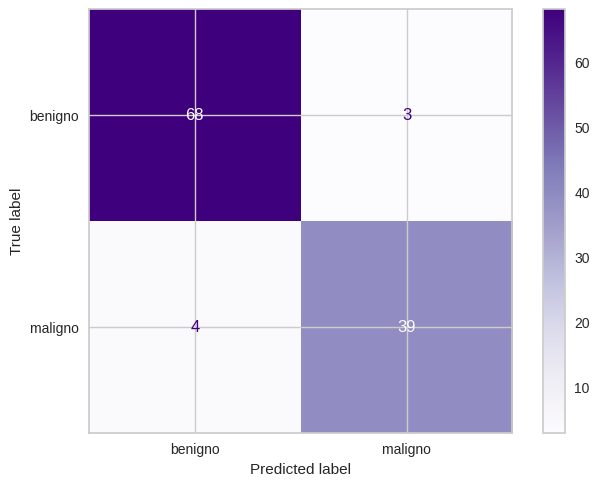

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



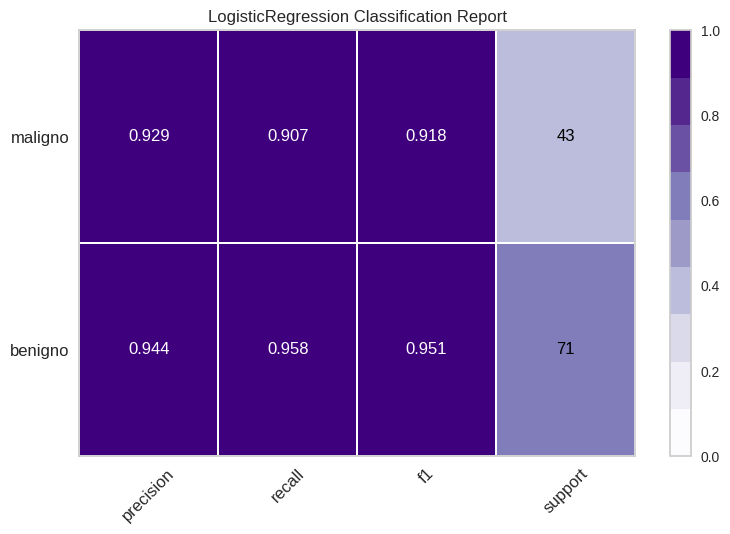

In [52]:
print ('''******************** TESTE ********************''')

y_pred =pipeline_rl.predict(X_test)


print('\n******************** Metricas do Treinamento ********************')

print(metrics.classification_report(y_test,y_pred))



print('''******************** Matris de Confusão ********************''')

ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels =['benigno','maligno']).plot(cmap="Purples")

plt.show()



classes = [ "benigno","maligno"]
visualizer = classification_report(
    pipeline_rl, X_train, y_train, X_test, y_test, support=True,cmap='Purples', classes=classes
)



In [53]:
dados_metricas(metricas,y_test,y_pred)

A alta precisão indica que a maioria das vezes que o modelo prevê um tumor como benigno , ele está correto (94% de precisão). O recall indica que o modelo identifica a grande maioria dos tumores benignos (96% ), ou seja, ele não deixa muitos casos de tumores benignos não identificados. Portanto, para tumores benignos, os diagnósticos tendem a ser corretos.
A alta precisão indica que, quando o modelo prevê um tumor como maligno (classe 1), ele está correto na maioria das vezes (93% de precisão). O recall de 0.91 indica que o modelo identifica a maioria dos tumores malignos (91% de revocação), ou seja, ele deixa de identificar 9% dos tumores malignos. Isso significa que existem alguns casos de tumores malignos não identificados (falsos negativos)

In [54]:
y_prob = pipeline_rl.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='Falso Positivo', y='Verdadeiro Postivo'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

 o modelo é capaz de distinguir muito bem entre as duas classes, com uma alta taxa de verdadeiros positivos (classificações corretas da classe positiva) e uma baixa taxa de falsos positivos (classificações incorretas da classe positiva). Em resumo, um valor de AUC de 0.9898 sugere que o modelo é altamente preciso na classificação das instâncias das duas classes e tem uma capacidade muito boa de separá-las.

## KNN

In [55]:

pipeline_knn = Pipeline(
                    [
                        ("Normalização", StandardScaler()),
                        ('KNN',KNeighborsClassifier(n_neighbors = 6))
                    ]
)


In [56]:
pipeline_knn.fit(X_train, y_train)

Pipeline(steps=[('Normalização', StandardScaler()),
                ('KNN', KNeighborsClassifier(n_neighbors=6))])

******************** TREINAMENTO ********************

******************** Metricas do Treinamento ********************
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       286
           1       0.96      0.83      0.89       169

    accuracy                           0.92       455
   macro avg       0.93      0.90      0.92       455
weighted avg       0.93      0.92      0.92       455

******************** Matris de Confusão ********************


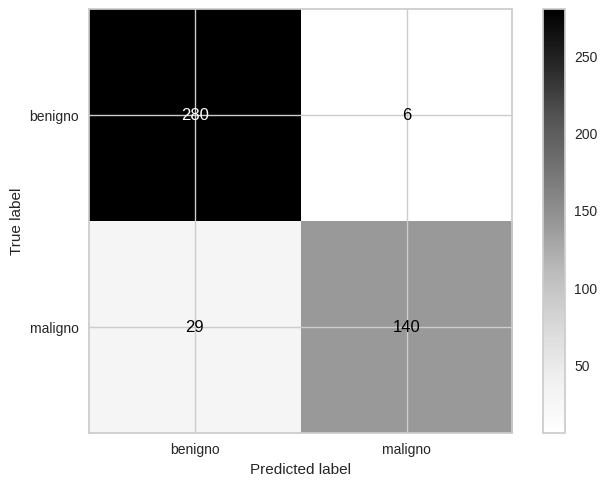

In [57]:
print ('''******************** TREINAMENTO ********************''')

y_pred_treino = pipeline_knn.predict(X_train)

print('\n******************** Metricas do Treinamento ********************')

print(metrics.classification_report(y_train,y_pred_treino))

print('''******************** Matris de Confusão ********************''')

ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_train, y_pred_treino),display_labels =['benigno','maligno']).plot(cmap="Greys")

plt.show()


******************** TESTE ********************

******************** Metricas do Teste ********************
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        71
           1       0.97      0.88      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

******************** Matris de Confusão ********************


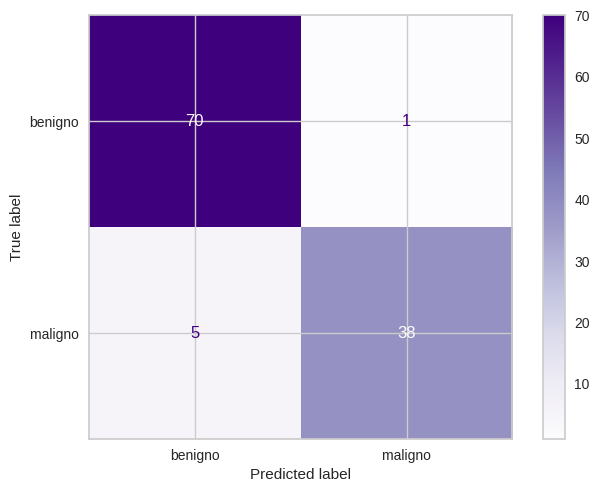

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



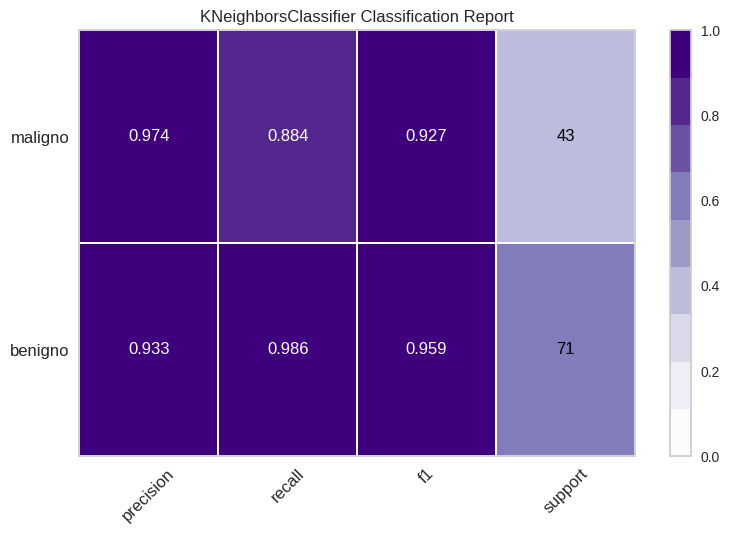

In [58]:
print ('''******************** TESTE ********************''')

y_pred =pipeline_knn.predict(X_test)

print('\n******************** Metricas do Teste ********************')

print(metrics.classification_report(y_test,y_pred))

print('''******************** Matris de Confusão ********************''')

ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),display_labels =['benigno','maligno']).plot(cmap="Purples")

plt.show()


classes = [ "benigno","maligno"]
visualizer = classification_report(
    pipeline_knn, X_train, y_train, X_test, y_test, support=True,cmap='Purples', classes=classes
)


In [59]:
dados_metricas(metricas,y_test,y_pred)

A alta precisão (0.93) indica que a maioria das vezes que o modelo prevê um diagnóstico de câncer benigno, ele está correto. A alta revocação (0.99) indica que o modelo identifica a grande maioria dos casos de câncer benigno, deixando poucos casos não identificados. Portanto, para diagnósticos de câncer benigno, os resultados parecem ser muito precisos e com baixa probabilidade de erro
A alta precisão (0.97) indica que a maioria das vezes que o modelo prevê um diagnóstico de câncer maligno, ele está correto. No entanto, a revocação (0.88) indica que o modelo deixa de identificar 12% dos casos de câncer maligno. Isso significa que existem alguns casos de câncer maligno não identificados (falsos negativos
Em resumo, os diagnósticos de câncer benigno parecem ser bastante precisos, com uma alta precisão e revocação. Por outro lado, os diagnósticos de câncer maligno são geralmente precisos, mas podem deixar de identificar alguns casos (falsos negativos).
Em um cenário de diagnóstico de câncer, é crítico minimizar os falsos negativos, uma vez que deixar de identificar um câncer maligno pode ter consequências graves para o paciente. Portanto, é importante continuar melhorando o recall para a classe 1, mesmo que isso signifique diminuir um pouco a precisão.

In [60]:
y_prob = pipeline_knn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='Falso Positivo', y='Verdadeiro Postivo'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

 Com o valor de AUC de 0.9782 sugere que o modelo é  preciso na classificação das instâncias das duas classes e tem uma capacidade muito boa de separá-las.

## Decision Tree

In [61]:

pipeline_dt = Pipeline(
                    [
                        ("Normalização", StandardScaler()),
                        ('Decision Tree',DecisionTreeClassifier( max_depth =  4))
                    ]
)


In [62]:
pipeline_dt.fit(X_train, y_train)

Pipeline(steps=[('Normalização', StandardScaler()),
                ('Decision Tree', DecisionTreeClassifier(max_depth=4))])

******************** TREINAMENTO ********************

******************** Metricas do Treinamento ********************
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       286
           1       0.99      0.84      0.91       169

    accuracy                           0.94       455
   macro avg       0.95      0.92      0.93       455
weighted avg       0.94      0.94      0.94       455

******************** Matris de Confusão ********************


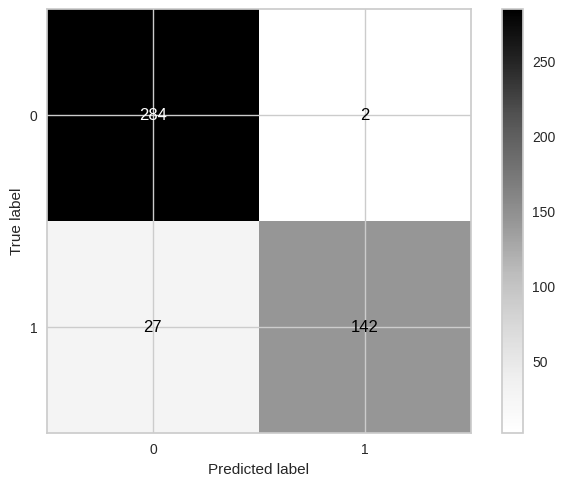

In [63]:
print ('''******************** TREINAMENTO ********************''')

y_pred_treino = pipeline_dt.predict(X_train)

print('\n******************** Metricas do Treinamento ********************')

print(metrics.classification_report(y_train,y_pred_treino))

print('''******************** Matris de Confusão ********************''')

ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_train, y_pred_treino)).plot(cmap="Greys")

plt.show()

******************** TESTE ********************

******************** Metricas do Teste ********************
              precision    recall  f1-score   support

           0       0.91      0.99      0.95        71
           1       0.97      0.84      0.90        43

    accuracy                           0.93       114
   macro avg       0.94      0.91      0.92       114
weighted avg       0.93      0.93      0.93       114

******************** Matris de Confusão ********************


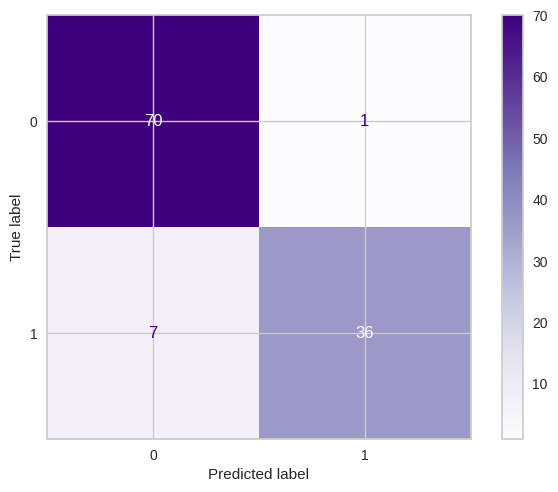

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



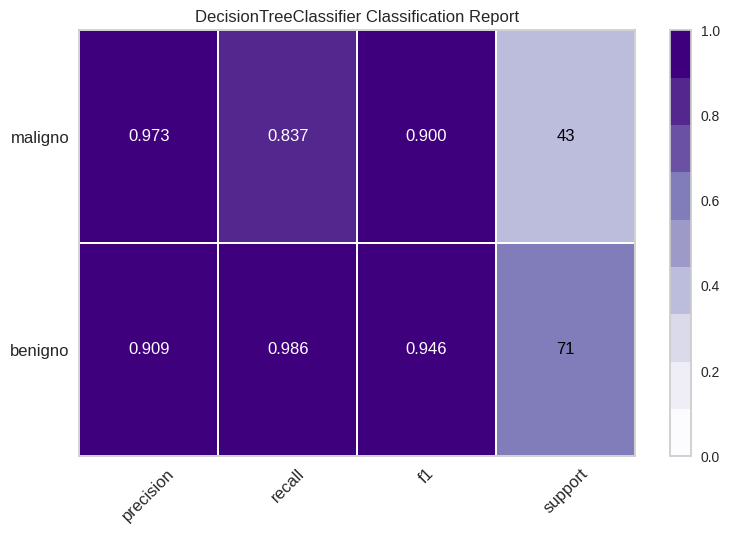

In [64]:
print ('''******************** TESTE ********************''')

y_pred =pipeline_dt.predict(X_test)

print('\n******************** Metricas do Teste ********************')

print(metrics.classification_report(y_test,y_pred))

print('''******************** Matris de Confusão ********************''')

ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred)).plot(cmap="Purples")

plt.show()

classes = [ "benigno","maligno"]
visualizer = classification_report(
    pipeline_dt, X_train, y_train, X_test, y_test, support=True,cmap='Purples', classes=classes
)


In [65]:
dados_metricas(metricas,y_test,y_pred)

A alta precisão (0.91) indica que a maioria das vezes que o modelo prevê um diagnóstico de câncer benigno (classe 0), ele está correto. A alta revocação (0.99) indica que o modelo identifica a grande maioria dos casos de câncer benigno, deixando apenas alguns casos não identificados. Portanto, para diagnósticos de câncer benigno, os resultados parecem ser bastante precisos, com alta precisão e revocação.

  A alta precisão (0.97) indica que a maioria das vezes que o modelo prevê um diagnóstico de câncer maligno (classe 1), ele está correto. No entanto, a revocação (0.84) indica que o modelo deixa de identificar 16% dos casos de câncer maligno. Isso significa que existem alguns casos de câncer maligno não identificados (falsos negativos).

 Em resumo, os diagnósticos de câncer benigno parecem ser bastante precisos, com alta precisão e revocação. No entanto, os diagnósticos de câncer maligno também têm alta precisão, mas podem deixar de identificar alguns casos (falsos negativos)







In [66]:
y_prob = pipeline_dt.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='Falso Positivo', y='Verdadeiro Postivo'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

## Random Forest

In [67]:

pipeline_rf = Pipeline(
                    [
                        ("Normalização", StandardScaler()),
                        ('Decision Tree',RandomForestClassifier(criterion= 'entropy', max_depth =  4, n_estimators = 10, random_state=42))
                    ]
)


In [68]:
pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('Normalização', StandardScaler()),
                ('Decision Tree',
                 RandomForestClassifier(criterion='entropy', max_depth=4,
                                        n_estimators=10, random_state=42))])

******************** TREINAMENTO ********************

******************** Metricas do Treinamento ********************
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       286
           1       0.97      0.86      0.92       169

    accuracy                           0.94       455
   macro avg       0.95      0.92      0.93       455
weighted avg       0.94      0.94      0.94       455

******************** Matris de Confusão ********************


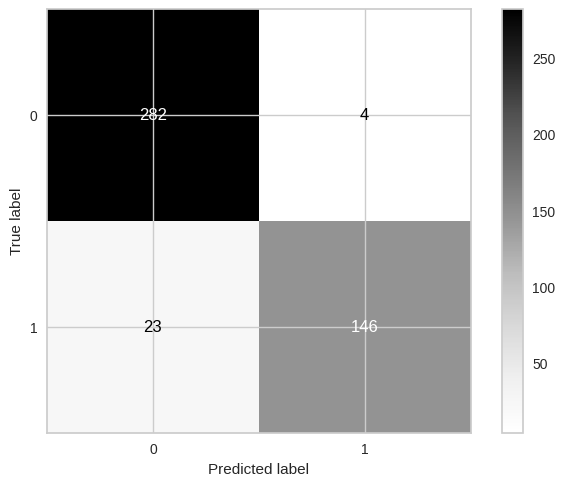

In [69]:
print ('''******************** TREINAMENTO ********************''')

y_pred_treino = pipeline_rf.predict(X_train)

print('\n******************** Metricas do Treinamento ********************')

print(metrics.classification_report(y_train,y_pred_treino))

print('''******************** Matris de Confusão ********************''')

ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_train, y_pred_treino)).plot(cmap="Greys")

plt.show()

******************** TESTE ********************

******************** Metricas do Teste ********************
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        71
           1       1.00      0.88      0.94        43

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114

******************** Matris de Confusão ********************


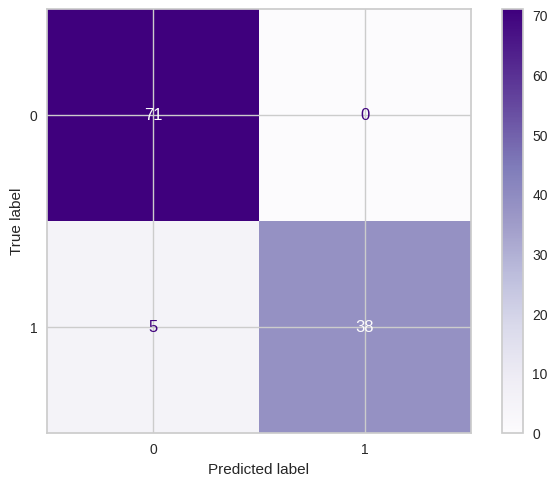

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



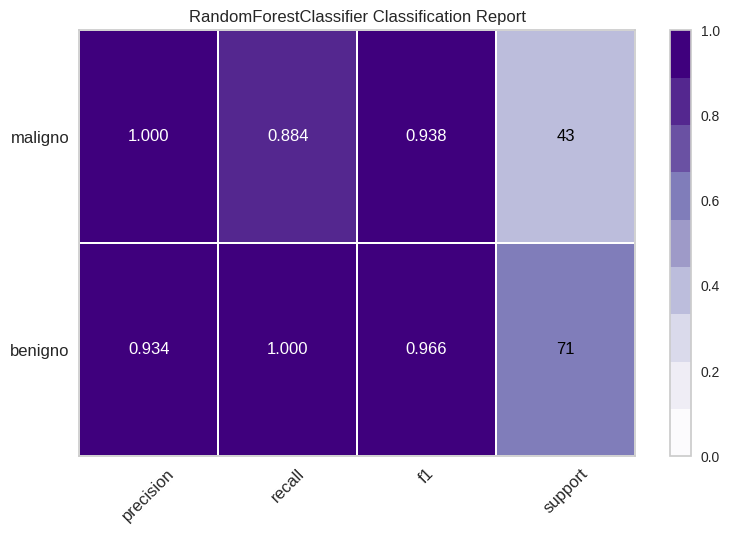

In [70]:
print ('''******************** TESTE ********************''')

y_pred =pipeline_rf.predict(X_test)

print('\n******************** Metricas do Teste ********************')

print(metrics.classification_report(y_test,y_pred))

print('''******************** Matris de Confusão ********************''')

ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred)).plot(cmap="Purples")

plt.show()

classes = [ "benigno","maligno"]
visualizer = classification_report(
    pipeline_rf, X_train, y_train, X_test, y_test, support=True,cmap='Purples', classes=classes
)


In [71]:
dados_metricas(metricas,y_test,y_pred)

A alta precisão indica que a maioria das vezes que o modelo prevê um tumor como benigno , ele está correto, isto é 93% das vezes. O alto recall indica que o modelo identifica a grande maioria dos tumores benignos (100%), ou seja, ele não deixa muitos casos de tumores benignos não identificados. Portanto, para tumores benignos, os diagnósticos tendem a ser corretos.
A alta precisão indica que, quando o modelo prevê um tumor como maligno , ele está correto em todas as vezes (100% de precisão). No entanto, o recall de 0.88 indica que o modelo deixa de identificar 12% dos tumores malignos. Isso significa que alguns casos de tumores malignos não são detectados. Portanto, para tumores malignos, embora os diagnósticos positivos sejam precisos, pode haver casos em que tumores malignos não são identificados (falsos negativos).
Em resumo, com base nos valores de precisão e recall, os diagnósticos de tumores benignos parecem estar corretos na grande maioria dos casos, enquanto os diagnósticos de tumores malignos são muito precisos, mas podem deixar de identificar alguns casos (falsos negativos). Portanto, a avaliação depende da importância de minimizar os falsos negativos em relação aos falsos positivos, o que pode variar de acordo com o contexto clínico e as implicações dos diagnósticos errados.

In [72]:
y_prob = pipeline_rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='Falso Positivo', y='Verdadeiro Postivo'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

Uma AUC de 0.9736 significa que o modelo é capaz de distinguir muito bem entre as duas classes e tem uma alta taxa de verdadeiros positivos (instâncias positivas corretamente classificadas) e uma baixa taxa de falsos positivos (instâncias negativas incorretamente classificadas como positivas)

Acurácia:

- Decision Tree: 0.93
- Regressão Logística: 0.94
- kNN: 0.95
- Random forest: 0.96

In [73]:
df = pd.DataFrame(metricas)
df['Modelo'] = ['Reg_Logistica', 'KNN','Decision Tree','Random Forest']

In [74]:
df

,Acuracia,Precisão,Recall,F-score,Modelo
0,0.938596,0.938457,0.938596,0.938450,Reg_Logistica
1,0.947368,0.948808,0.947368,0.946806,KNN
2,0.929825,0.933187,0.929825,0.928615,Decision Tree
3,0.956140,0.959026,0.956140,0.955533,Random Forest


In [75]:
df = pd.melt(df, id_vars=['Modelo'], var_name='Metrica', value_name='Valor')

In [76]:

fig = px.line(df, x="Metrica", y="Valor", color="Modelo",markers=True)
fig.update_traces(textposition="bottom right")
fig.show()